In [2]:
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().system(' pip install pmdarima')
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/colab/test.csv', index_col=[0], parse_dates=True)
df.head()


,Qden
Date,
2015-09-16,91
2015-09-17,70.77
2015-09-18,117.44
2015-09-19,146.9
2015-09-20,110.87


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2359 entries, 2015-09-16 to 2022-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Qden    2359 non-null   object
dtypes: object(1)
memory usage: 36.9+ KB


In [ ]:
df['Qden'] = pd.to_numeric(df['Qden'], errors='coerce')

In [ ]:
df.isnull().value_counts()

Qden 
False    2348
True       11
dtype: int64

In [ ]:
df['Qden'] = df['Qden'].fillna(115)
df.describe()

,Qden
count,2359.000000
mean,108.446304
std,141.813385
min,2.800000
25%,21.965000
50%,46.530000
75%,144.405000
max,982.850000


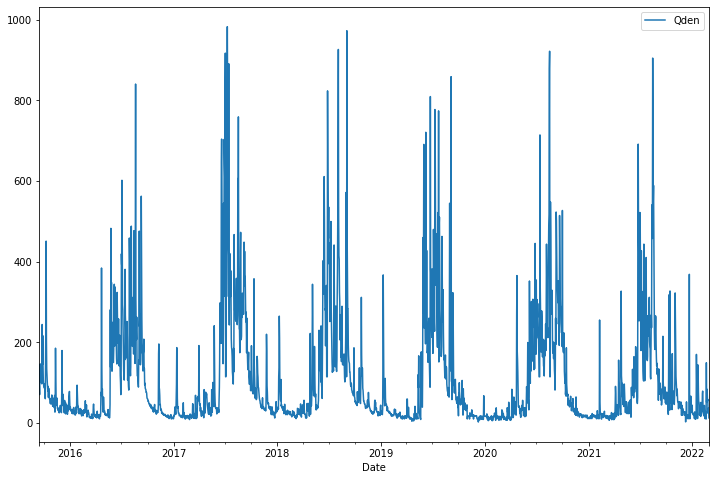

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def ad_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF :", dftest[0])
  print("2. P-value :",dftest[1])
  print("3. Num of Lags :",dftest[2])
  print("4. Number of Observations User For ADF Resgessstion And Critical Values Caculation :",dftest[3])
  print("5. Critical Values :")
  for key,val in dftest[4].items():
    print("\t",key, ":", val)

In [ ]:
ad_test(df['Qden'])

1. ADF : -4.089526891085456
2. P-value : 0.0010078590959961776
3. Num of Lags : 25
4. Number of Observations User For ADF Resgessstion And Critical Values Caculation : 2333
5. Critical Values :
	 1% : -3.4331560478447343
	 5% : -2.8627796580313234
	 10% : -2.567429924573145


In [ ]:
stepwise_fit =  auto_arima(df['Qden'],trace = True,
                          supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=27497.270, Time=6.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=30072.939, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=27730.925, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=28760.086, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=31157.505, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=27504.440, Time=2.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=27496.301, Time=2.49 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=27591.739, Time=1.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=27655.485, Time=0.29 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=27497.503, Time=2.49 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=27578.868, Time=0.53 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=27500.291, Time=3.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=27505.601, Time=0.86 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 20.453 seconds


In [ ]:
stepwise_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2359
Model:               SARIMAX(2, 0, 1)   Log Likelihood              -13743.151
Date:                Sun, 19 Jun 2022   AIC                          27496.301
Time:                        15:19:58   BIC                          27525.131
Sample:                             0   HQIC                         27506.799
                               - 2359                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3324      0.826      1.613      0.107      -0.286       2.951
ar.L1          1.3919      0.020     69.828      0.000       1.353       1.431
ar.L2         -0.4043      0.018    -22.745      0.000      -0.439      -0.369
ma.L1         -0.8297      0.015    -55.116      0.000      -0.859      -0.800
sigma2      6722.4791     88.692     75.796      0.000    6548.646    6896.312
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):             53477.72
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             2.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
print(df.shape)
train = df.iloc[:-235]
test = df.iloc[-235:]
print(train.shape,test.shape)

(2359, 1)
(2124, 1) (235, 1)


In [ ]:
arima_model = ARIMA(df['Qden'], order=(2,0,1)) 
model =arima_model.fit()

model.summary()

In [ ]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start = start, end = end, typ = 'levels')
print(pred)

2021-07-10    301.608962
2021-07-11    252.369461
2021-07-12    216.381930
2021-07-13    180.762933
2021-07-14    161.279997
                 ...    
2022-02-25     59.675676
2022-02-26     61.845147
2022-02-27     42.591876
2022-02-28     42.598055
2022-03-01     46.917923
Freq: D, Name: predicted_mean, Length: 235, dtype: float64


In [ ]:
pred.size

235

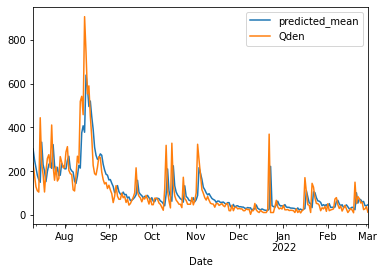

In [ ]:
pred.plot(legend = True)
test['Qden'].plot(legend = True)

In [ ]:
test['Qden'].mean()

107.50076595744682

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['Qden']))
print(rmse)

73.6785723686013


In [ ]:
model2 = ARIMA(df['Qden'],order=(2,0,1))
model2 = model2.fit()
df.tail()

,Qden
Date,
2022-02-25,58.90
2022-02-26,24.45
2022-02-27,28.10
2022-02-28,38.40
2022-03-01,13.00


In [ ]:
#for future date
index_future_dates = pd.date_range(start = '2022-03-01', end ='2022-04-01')
pred=model2.predict(start = len(df), end = len(df)+30, typ= 'levels').rename('ARIMA Predictions')
print(pred)


2022-03-02    32.058154
2022-03-03    40.712805
2022-03-04    45.053578
2022-03-05    47.596229
2022-03-06    49.380271
2022-03-07    50.835424
2022-03-08    52.139522
2022-03-09    53.366341
2022-03-10    54.546671
2022-03-11    55.693539
2022-03-12    56.812628
2022-03-13    57.906581
2022-03-14    58.976778
2022-03-15    60.024073
2022-03-16    61.049095
2022-03-17    62.052376
2022-03-18    63.034401
2022-03-19    63.995630
2022-03-20    64.936508
2022-03-21    65.857466
2022-03-22    66.758928
2022-03-23    67.641306
2022-03-24    68.505004
2022-03-25    69.350419
2022-03-26    70.177937
2022-03-27    70.987936
2022-03-28    71.780789
2022-03-29    72.556857
2022-03-30    73.316496
2022-03-31    74.060055
2022-04-01    74.787872
Freq: D, Name: ARIMA Predictions, dtype: float64


In [1]:
pred.plot(figsize=(12,8), legend= True)

NameError: name 'pred' is not defined